In [1]:
import sys,os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import tifffile
sys.path.append('../')

## Notebooks Most Votes　されているのを参考にした.
[HuBMAP - Exploratory Data Analysis](https://www.kaggle.com/ihelon/hubmap-exploratory-data-analysis)



In [2]:
DATASET_PATH = "../data_ignore/datasets/"
TRAIN_PATH  =  os.path.join(DATASET_PATH,"train")
TEST_PATH = os.path.join(DATASET_PATH,"test")

In [3]:
df_train = pd.read_csv(os.path.join(DATASET_PATH,"train.csv"))
df_sub = pd.read_csv(os.path.join(DATASET_PATH,'sample_submission.csv'))
df_info = pd.read_csv(os.path.join(DATASET_PATH,'HuBMAP-20-dataset_information.csv'))

train.csvは画像の固有IDと,RLEエンコード表現された画像内のオブジェクトのマスクが含まれてる

train.csvの患者数(ID)は8つ,submissionは5つ

HuBMAP-20-dataset_informationにはそれぞれの患者の追加データが含まれる.


In [4]:
df_train.head()

id                                           encoding
0  2f6ecfcdf  296084587 4 296115835 6 296115859 14 296147109...
1  aaa6a05cc  30989109 59 31007591 64 31026074 68 31044556 7...
2  cb2d976f4  78144363 5 78179297 15 78214231 25 78249165 35...
3  0486052bb  101676003 6 101701785 8 101727568 9 101753351 ...
4  e79de561c  7464094 14 7480273 41 7496453 67 7512632 82 75...

画像を表示してみる

In [16]:
from scripts.utility_func import *

Train Data

In [6]:
small_ids = [
    "0486052bb", "095bf7a1f", "1e2425f28", "2f6ecfcdf",
    "54f2eec69", "aaa6a05cc", "cb2d976f4", "e79de561c",
]
small_images = []
small_masks = []

for small_id in small_ids:
    tmp_image, tmp_mask = read_image(small_id, scale=20, verbose=0)
    small_images.append(tmp_image)
    small_masks.append(tmp_mask)

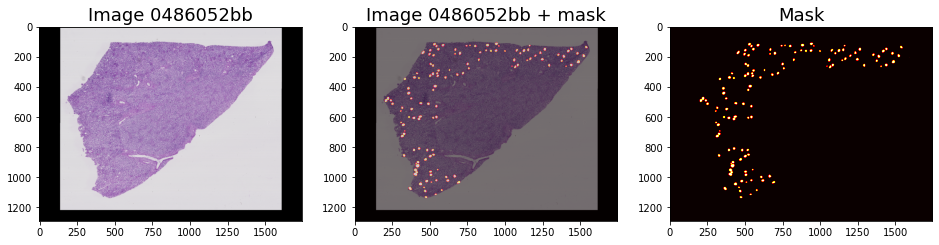

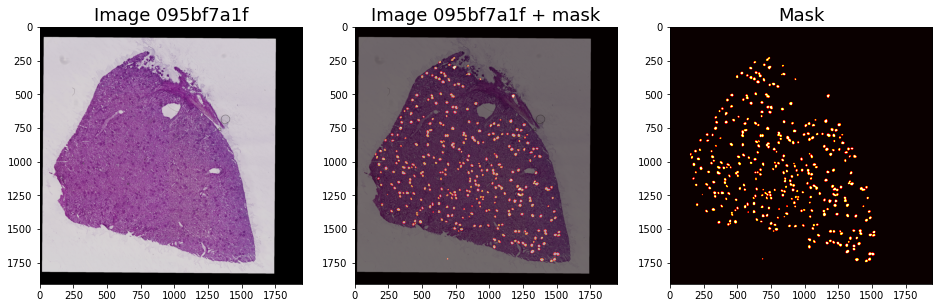

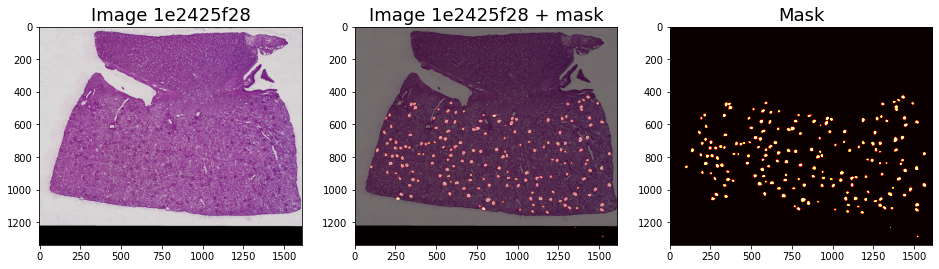

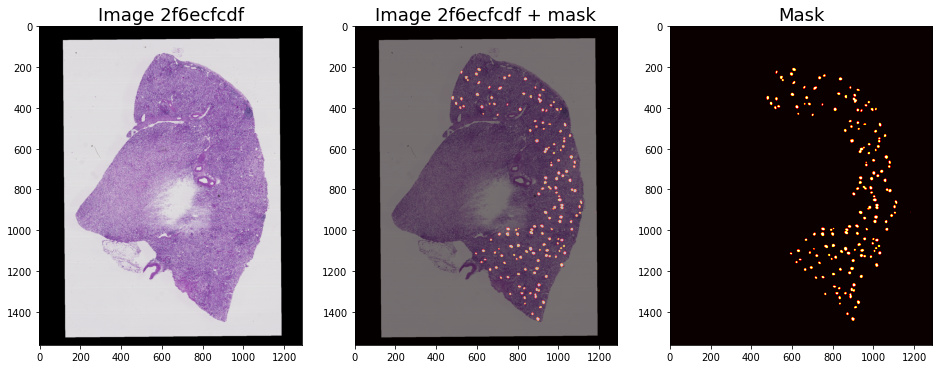

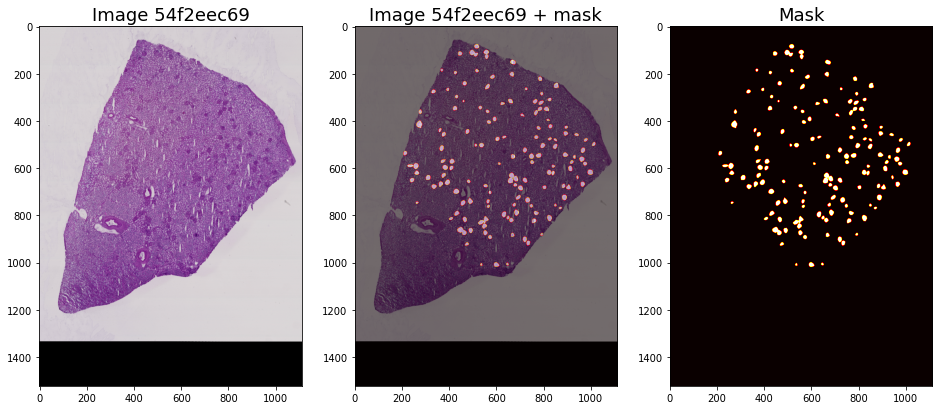

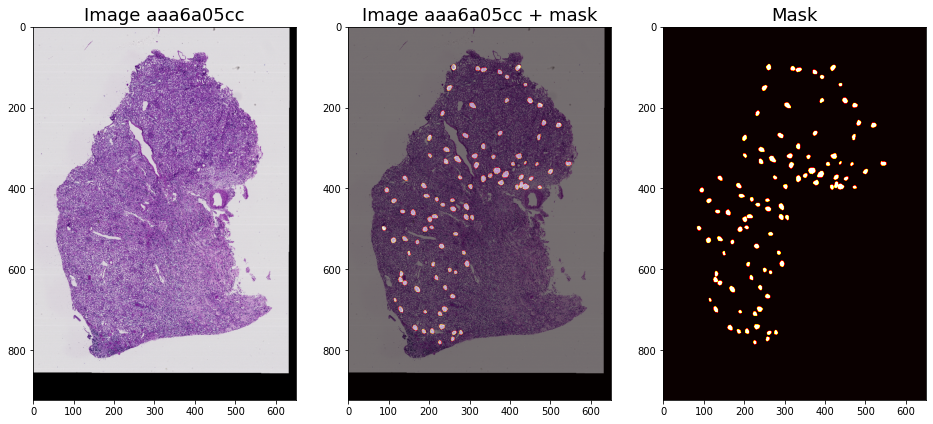

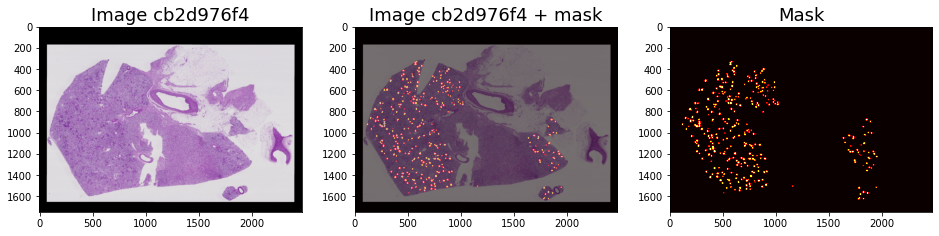

In [13]:
for i in range(0,len(small_ids)-1):
    plot_image_and_mask(image=small_images[i],mask=small_masks[i],image_id = small_ids[i])


Test Data

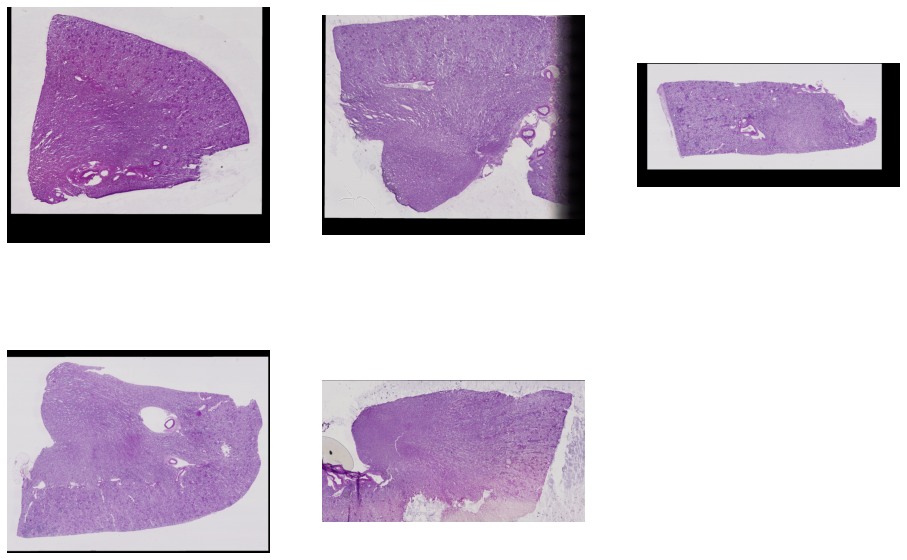

In [47]:
small_ids = [
    "26dc41664", "afa5e8098", "b2dc8411c", "b9a3865fc", "c68fe75ea",
]
small_images = []

for small_id in small_ids:
    tmp_image = read_test_image(small_id, scale=20, verbose=0)
    small_images.append(tmp_image)

plt.figure(figsize=(16, 11))
for ind, (tmp_id, tmp_image) in enumerate(zip(small_ids, small_images)):
    plt.subplot(2, 3, ind + 1)
    plt.imshow(tmp_image)
    plt.axis("off")

## Data Analysis

In [17]:
# 腎皮質,腎髄質などのjson file
pd.read_json(os.path.join(DATASET_PATH,"train/1e2425f28-anatomical-structure.json"))

type                    id  \
0  Feature  PathAnnotationObject   
1  Feature  PathAnnotationObject   

                                            geometry  \
0  {'type': 'Polygon', 'coordinates': [[[29145, 7...   
1  {'type': 'Polygon', 'coordinates': [[[7730, 55...   

                                          properties  
0  {'classification': {'name': 'Cortex', 'colorRG...  
1  {'classification': {'name': 'Medulla', 'colorR...

In [19]:
# 糸球体のmask json file?
pd.read_json(os.path.join(DATASET_PATH, "train/0486052bb.json"))

type                    id  \
0    Feature  PathAnnotationObject   
1    Feature  PathAnnotationObject   
2    Feature  PathAnnotationObject   
3    Feature  PathAnnotationObject   
4    Feature  PathAnnotationObject   
..       ...                   ...   
121  Feature  PathAnnotationObject   
122  Feature  PathAnnotationObject   
123  Feature  PathAnnotationObject   
124  Feature  PathAnnotationObject   
125  Feature  PathAnnotationObject   

                                              geometry  \
0    {'type': 'Polygon', 'coordinates': [[[4747, 96...   
1    {'type': 'Polygon', 'coordinates': [[[6631, 67...   
2    {'type': 'Polygon', 'coordinates': [[[6287, 10...   
3    {'type': 'Polygon', 'coordinates': [[[6579, 13...   
4    {'type': 'Polygon', 'coordinates': [[[8779, 11...   
..                                                 ...   
121  {'type': 'Polygon', 'coordinates': [[[23073, 2...   
122  {'type': 'Polygon', 'coordinates': [[[20891, 5...   
123  {'type': 'Polygon', 'coordinates': [[[15277, 2...   
124  {'type': 'Polygon', 'coordinates': [[[7172, 85...   
125  {'type': 'Polygon', 'coordinates': [[[4139, 95...   

                                            properties  
0    {'classification': {'name': 'glomerulus', 'col...  
1    {'classification': {'name': 'glomerulus', 'col...  
2    {'classification': {'name': 'glomerulus', 'col...  
3    {'classification': {'name': 'glomerulus', 'col...  
4    {'classification': {'name': 'glomerulus', 'col...  
..                                                 ...  
121  {'classification': {'name': 'glomerulus', 'col...  
122  {'classification': {'name': 'glomerulus', 'col...  
123  {'classification': {'name': 'glomerulus', 'col...  
124  {'classification': {'name': 'glomerulus', 'col...  
125  {'classification': {'name': 'glomerulus', 'col...  

[126 rows x 4 columns]

In [24]:
#df_infoに新しくcolumnの追加.
#dataがtrainのpatientか,testのpatientか.
df_info["split"] = "test"
df_info.loc[df_info["image_file"].isin(os.listdir(os.path.join(DATASET_PATH, "train"))), "split"] = "train"

In [26]:
# areaに画像のピクセル(one-dimention)を追加.
df_info["area"] = df_info["width_pixels"] * df_info["height_pixels"]

In [27]:
df_info.head()

image_file  width_pixels  height_pixels  \
0  afa5e8098.tiff         43780          36800   
1  54f2eec69.tiff         22240          30440   
2  1e2425f28.tiff         32220          26780   
3  e79de561c.tiff         27020          16180   
4  c68fe75ea.tiff         19780          26840   

  anatomical_structures_segmention_file glomerulus_segmentation_file  \
0   afa5e8098-anatomical-structure.json               afa5e8098.json   
1   54f2eec69-anatomical-structure.json               54f2eec69.json   
2   1e2425f28-anatomical-structure.json               1e2425f28.json   
3   e79de561c-anatomical-structure.json               e79de561c.json   
4   c68fe75ea-anatomical-structure.json               c68fe75ea.json   

   patient_number                       race               ethnicity     sex  \
0           67347                      White  Not Hispanic or Latino  Female   
1           67548  Black or African American  Not Hispanic or Latino    Male   
2           63921                      White  Not Hispanic or Latino    Male   
3           67026  Black or African American  Not Hispanic or Latino    Male   
4           67112                      White  Not Hispanic or Latino    Male   

   age  weight_kilograms  height_centimeters  bmi_kg/m^2 laterality  \
0   58              59.0               160.0        23.0      Right   
1   58              79.9               190.5        22.0      Right   
2   48             131.5               193.0        35.3      Right   
3   53              73.0               166.0        26.5       Left   
4   56              91.2               167.6        32.5       Left   

   percent_cortex  percent_medulla  split        area  
0              55               45   test  1611104000  
1              75               25  train   676985600  
2              65               35  train   862851600  
3              55               45  train   437183600  
4              80               20   test   530895200

##　それぞれの特微量内容のカウントを調べる.
偏ってたり,どちらかのみの場合は削除

ethnicityは不要?

<AxesSubplot:xlabel='area', ylabel='Count'>

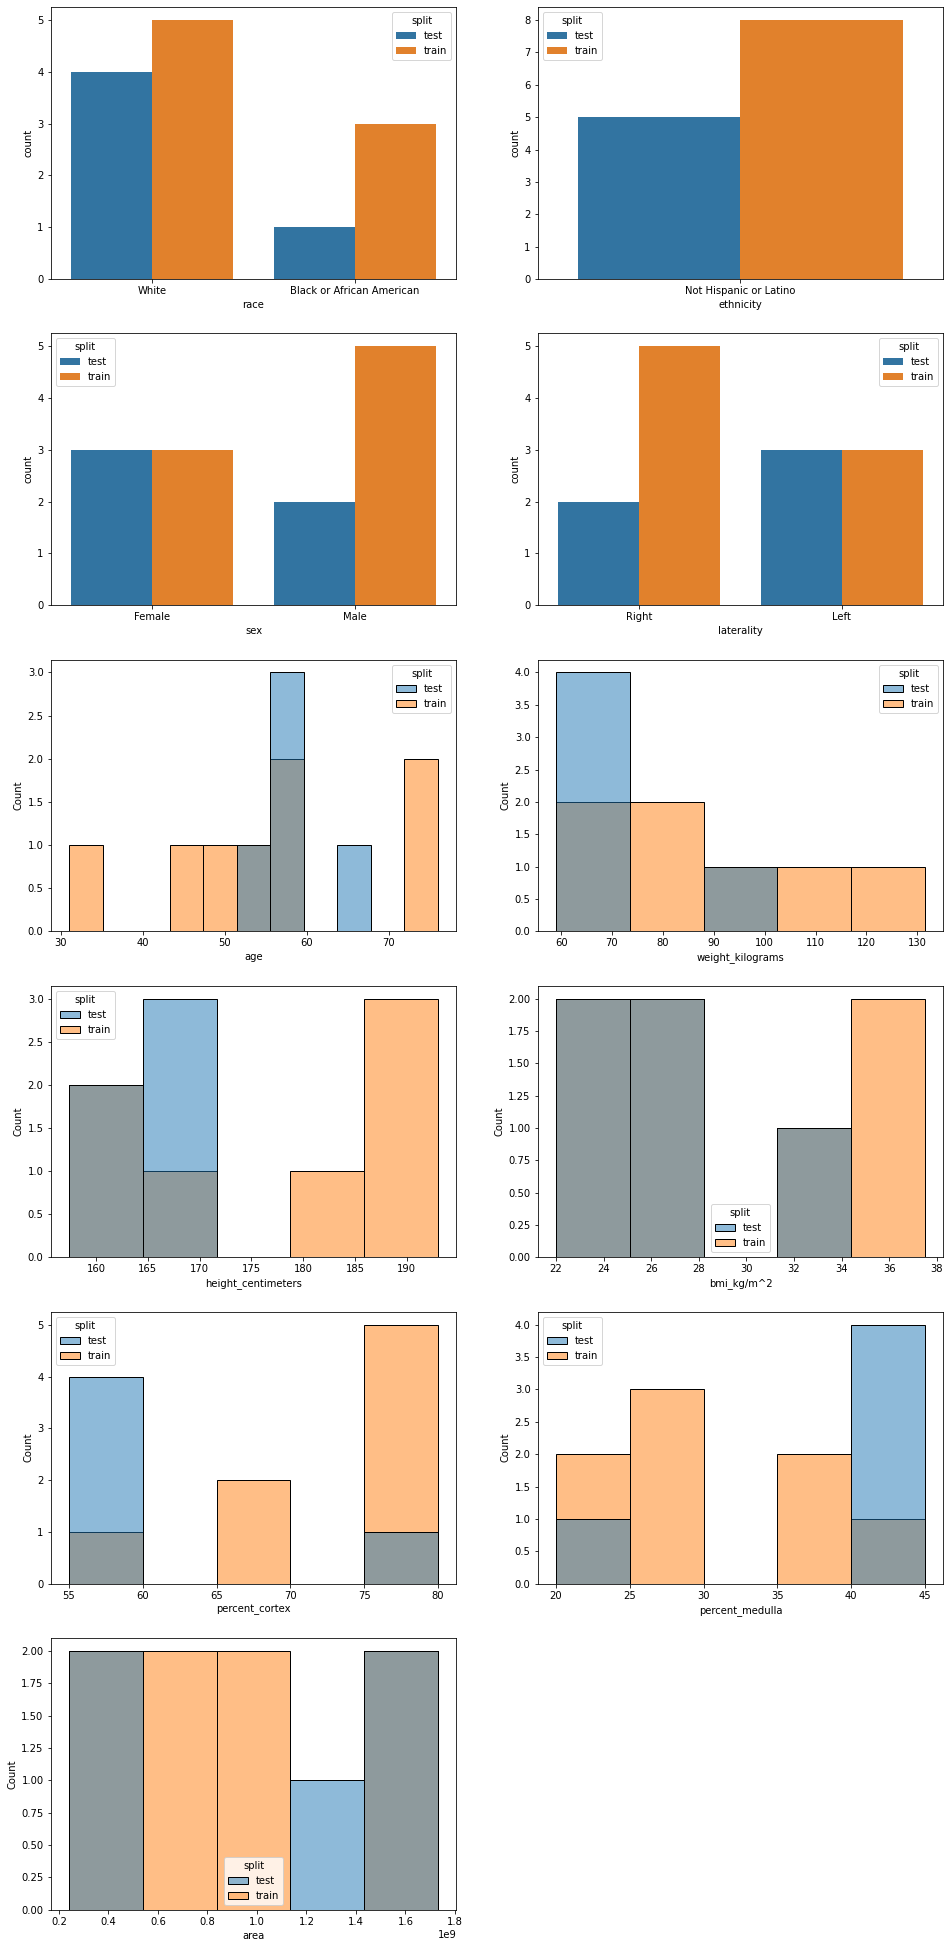

In [29]:
plt.figure(figsize=(16, 35))
plt.subplot(6, 2, 1)
sn.countplot(x="race", hue="split", data=df_info)
plt.subplot(6, 2, 2)
sn.countplot(x="ethnicity", hue="split", data=df_info)
plt.subplot(6, 2, 3)
sn.countplot(x="sex", hue="split", data=df_info)
plt.subplot(6, 2, 4)
sn.countplot(x="laterality", hue="split", data=df_info)
plt.subplot(6, 2, 5)
sn.histplot(x="age", hue="split", data=df_info)
plt.subplot(6, 2, 6)
sn.histplot(x="weight_kilograms", hue="split", data=df_info)
plt.subplot(6, 2, 7)
sn.histplot(x="height_centimeters", hue="split", data=df_info)
plt.subplot(6, 2, 8)
sn.histplot(x="bmi_kg/m^2", hue="split", data=df_info)
plt.subplot(6, 2, 9)
sn.histplot(x="percent_cortex", hue="split", data=df_info)
plt.subplot(6, 2, 10)
sn.histplot(x="percent_medulla", hue="split", data=df_info)
plt.subplot(6, 2, 11)
sn.histplot(x="area", hue="split", data=df_info)